# Лабораторна робота 5

**Тема:** Класифікація наборів даних


Встановлення
білбліотек:

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install sklearn



### Створення набору даних за допомогою Dataset Generator

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Classes
0  -2.397273  -1.267965   0.023413   1.402089   1.026502        2
1   1.959020   0.385728   1.252484   0.106517  -1.598633        3
2  -1.195627   0.506412   1.447740   1.233844   1.465171        2
3   0.002805   1.324508  -0.860858  -1.263876   1.366589        0
4  -0.826833   0.503893  -2.256251  -1.644423   1.497181        2
5   0.698674   1.688842   1.191732  -0.135678   0.853004        3
6   0.739092  -1.131468  -1.550656  -0.866664  -1.629500        1
7  -0.864419   1.243753  -1.531707  -1.439960   2.173276        0
8   1.121593   1.568913  -0.085020  -1.169284   0.470701        1
9   2.142188   3.251125   0.015670  -2.220236   1.126824        1


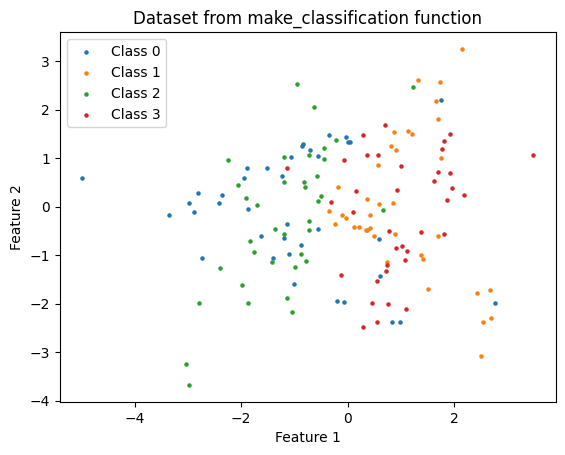

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=150, n_features=5, n_classes=4, n_informative=3, random_state=10)

df_from_make_class = pd.DataFrame(X, columns=[f'Feature {i+1}' for i in range(X.shape[1])])
df_from_make_class['Classes'] = y

#function to scatter plot dataset features
def visualize_dataset(X, y, features=[0,1], name="Dataset"):
    for class_value in np.unique(y):
        class_data = X[y == class_value]

        plt.scatter(class_data.iloc[:, features[0]], class_data.iloc[:, features[1]],
                    label=f'Class {class_value}', s=5)
    plt.title(name)
    plt.xlabel(X.columns[features[0]])
    plt.ylabel(X.columns[features[1]])
    plt.legend()
    plt.show()

print(df_from_make_class.head(10))
name = "Dataset from make_classification function"
visualize_dataset(df_from_make_class.iloc[:,0:-1], df_from_make_class.iloc[:,-1], name=name)

### Отримання набору даних з файла

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
7  30519    629.727       212.996755       182.737204      1.165591   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986  

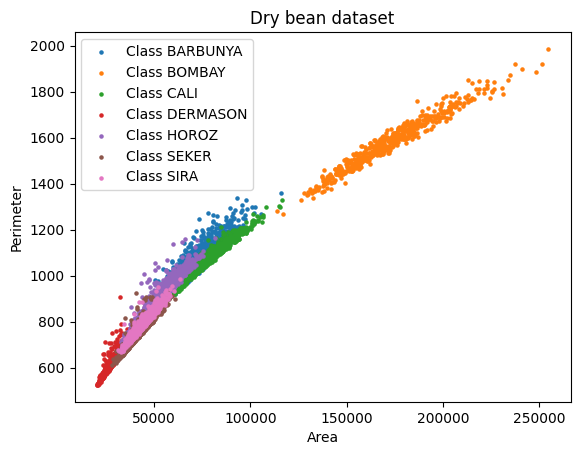

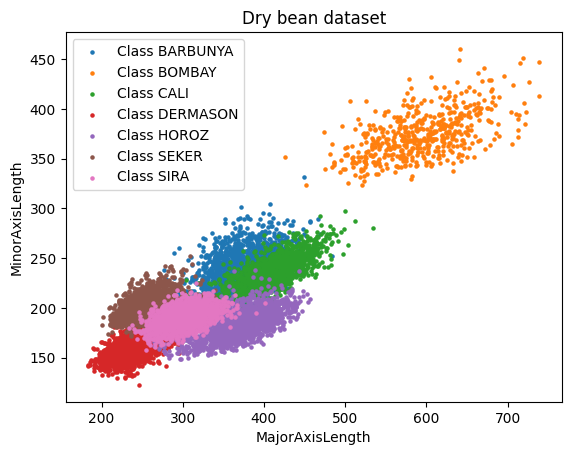

In [2]:
df_from_file = pd.read_csv("data/Dry_Bean_Dataset.csv")
name = "Dry bean dataset"
print(df_from_file.head(10))
visualize_dataset(df_from_file.iloc[:,0:-1], df_from_file.iloc[:,-1], name=name)
visualize_dataset(df_from_file.iloc[:,0:-1], df_from_file.iloc[:,-1], [2,3], name=name)

### Створення власної функції для генерування набору даних для класифікації

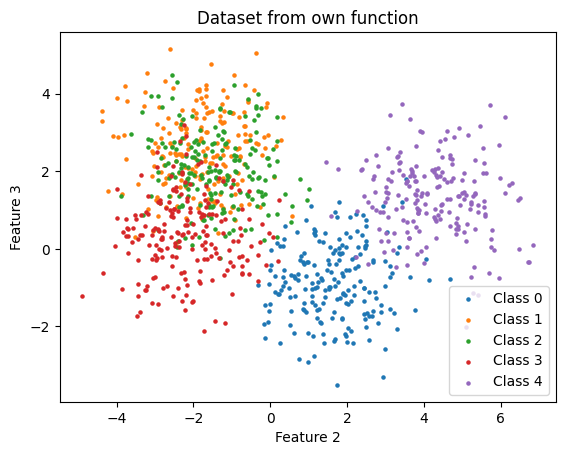

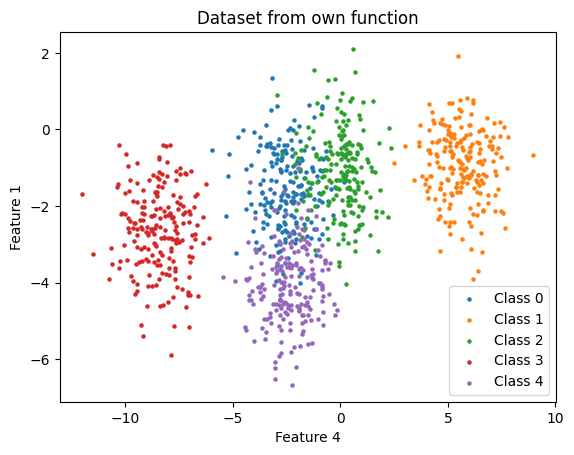

In [3]:
def create_classification_dataset(n_samples=100, n_features=2, n_classes=3, random_state=None):
    np.random.seed(random_state)
    X = []
    y = []
    samples_per_class = np.append(np.full(n_classes-1, n_samples//n_classes), (n_samples//n_classes + n_samples%n_classes))

    #for each class a cluster is created, it's center and data around it is generated randomly
    for cluster in range(n_classes):
        cluster_center = np.random.randn(n_features) *5
        cluster_data = np.random.randn(samples_per_class[cluster], n_features)
        X.extend(cluster_center + cluster_data)
        y.extend(np.full(samples_per_class[cluster], cluster))

    df = pd.DataFrame(X, columns=[f"Feature {i+1}" for i in range(n_features)])
    df['Class'] = y

    return df

# Example usage
df_from_own_function = create_classification_dataset(n_samples=1000, n_features=4, n_classes=5, random_state=15)
print()
name = "Dataset from own function"
visualize_dataset(df_from_own_function.iloc[:,0:-1], df_from_own_function.iloc[:,-1], [1,2], name=name)
visualize_dataset(df_from_own_function.iloc[:,0:-1], df_from_own_function.iloc[:,-1], [3,0], name=name)

### Створення моделей для отриманих наборів даних

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from time import sleep

def train_model(df):
    X = df.iloc[:, 0:-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

    #scaling data
    scaler = StandardScaler()
    Scaled_X_train = scaler.fit_transform(X_train)
    Scaled_X_test = scaler.transform(X_test)

    #creating the model
    log_model = LogisticRegression()
    log_model.fit(Scaled_X_train, y_train)

    y_pred = log_model.predict(Scaled_X_test)
    confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay.from_estimator(log_model, Scaled_X_test, y_test)
    print(classification_report(y_test, y_pred))
    return [log_model, Scaled_X_test, y_test]


Модель за набором даних згенерованим make_classification

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.62      0.83      0.71         6
           2       0.67      0.86      0.75         7
           3       0.50      0.75      0.60         4

    accuracy                           0.67        30
   macro avg       0.66      0.73      0.67        30
weighted avg       0.72      0.67      0.66        30



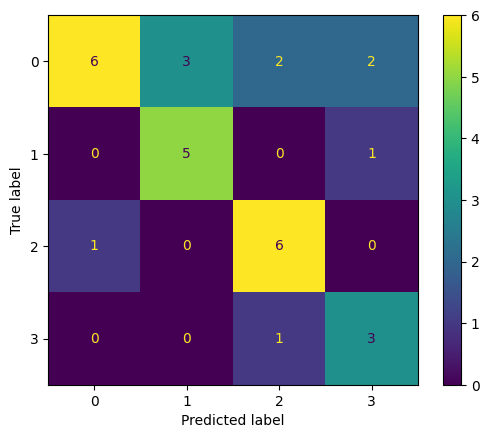

In [5]:
model_make_class_dataset, X1, y1 = train_model(df_from_make_class)

Модель за набором даних з файлу

              precision    recall  f1-score   support

    BARBUNYA       0.98      0.92      0.95       271
      BOMBAY       1.00      1.00      1.00        99
        CALI       0.94      0.96      0.95       333
    DERMASON       0.93      0.90      0.92       701
       HOROZ       0.95      0.95      0.95       369
       SEKER       0.96      0.95      0.95       397
        SIRA       0.85      0.90      0.87       553

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



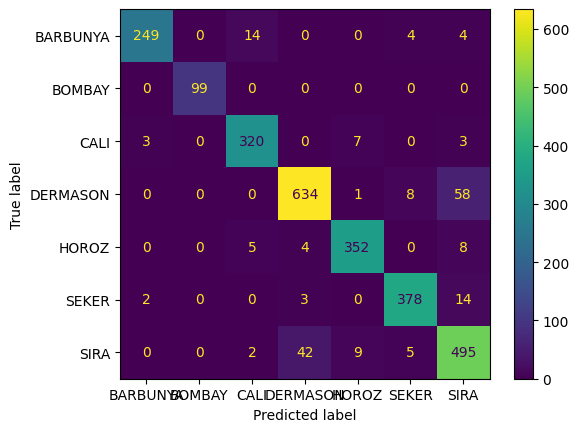

In [6]:
model_bean_dataset, X2, y2 = train_model(df_from_file)

Модель за набором даних згенерованим власною функцією

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       1.00      1.00      1.00        38
           2       0.97      1.00      0.99        36
           3       1.00      1.00      1.00        40
           4       0.98      0.98      0.98        44

    accuracy                           0.98       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.98      0.98       200



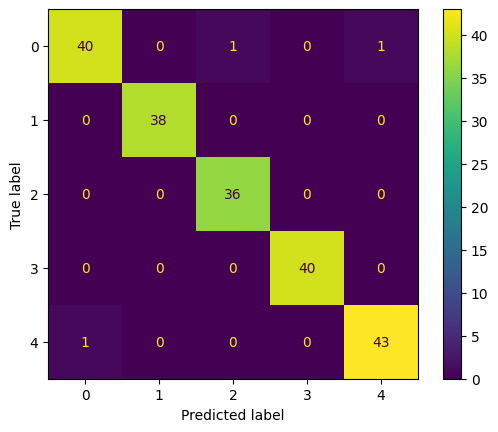

In [7]:
model_own_dataset, X3, y3 = train_model(df_from_own_function)

### Оптимізація моделей

In [12]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

def optimize_model(model, X, y):
    penalty = ['l1', 'l2', 'elasticnet']
    C = np.logspace(0,20,50)
    solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    multi_class = ['ovr', 'multinomial']
    l1_ratio = np.linspace(0, 1, 20)

    param_grid = {
       'penalty': penalty,
        'C': C,
        'solver': solver,
        'multi_class': multi_class,
        'l1_ratio': l1_ratio
    }

    grid_model = RandomizedSearchCV(model, param_distributions = param_grid, n_jobs=-1, n_iter=100)
    grid_model.fit(X, y)

    y_pred = grid_model.predict(X)
    ConfusionMatrixDisplay.from_estimator(model, X, y)
    print(classification_report(y, y_pred))

    return grid_model

Модель за набором даних згенерованим make_classification


              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.67      0.67      0.67         6
           2       0.75      0.86      0.80         7
           3       1.00      0.25      0.40         4

    accuracy                           0.73        30
   macro avg       0.79      0.65      0.66        30
weighted avg       0.76      0.73      0.71        30



RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 2.55954792e+00, 6.55128557e+00, 1.67683294e+01,
       4.29193426e+01, 1.09854114e+02, 2.81176870e+02, 7.19685673e+02,
       1.84206997e+03, 4.71486636e+03, 1.20679264e+04, 3.08884360e+04,
       7.90604321e+04, 2.02358965e+05, 5.17947468e+05, 1.32571137e+06,
       3.39322...
                                        'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

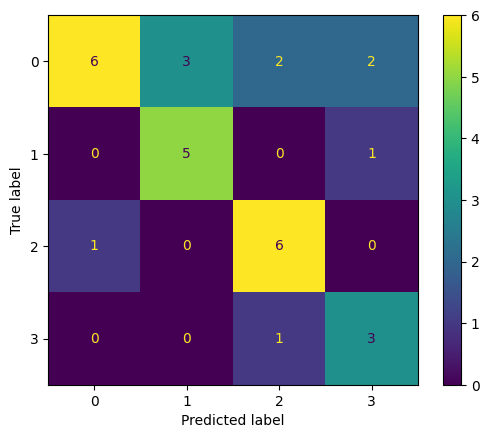

In [13]:
optimize_model(model_make_class_dataset, X1, y1)

Модель за набором даних з файлу


              precision    recall  f1-score   support

    BARBUNYA       0.97      0.96      0.96       271
      BOMBAY       1.00      1.00      1.00        99
        CALI       0.97      0.96      0.96       333
    DERMASON       0.93      0.91      0.92       701
       HOROZ       0.97      0.95      0.96       369
       SEKER       0.97      0.95      0.96       397
        SIRA       0.86      0.90      0.88       553

    accuracy                           0.94      2723
   macro avg       0.95      0.95      0.95      2723
weighted avg       0.94      0.94      0.94      2723



RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 2.55954792e+00, 6.55128557e+00, 1.67683294e+01,
       4.29193426e+01, 1.09854114e+02, 2.81176870e+02, 7.19685673e+02,
       1.84206997e+03, 4.71486636e+03, 1.20679264e+04, 3.08884360e+04,
       7.90604321e+04, 2.02358965e+05, 5.17947468e+05, 1.32571137e+06,
       3.39322...
                                        'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

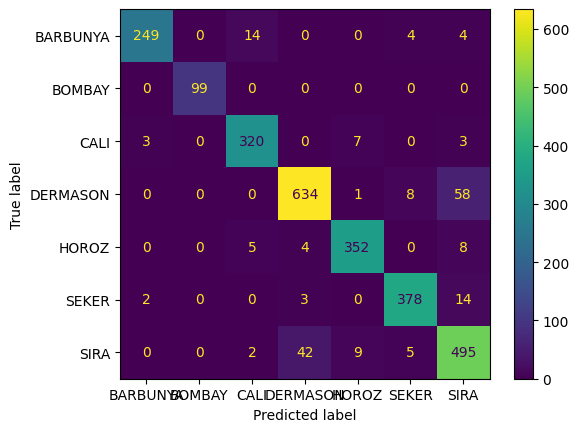

In [14]:
optimize_model(model_bean_dataset, X2, y2)

Модель за набором даних згенерованим власною функцією


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        40
           4       0.98      0.98      0.98        44

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+00, 2.55954792e+00, 6.55128557e+00, 1.67683294e+01,
       4.29193426e+01, 1.09854114e+02, 2.81176870e+02, 7.19685673e+02,
       1.84206997e+03, 4.71486636e+03, 1.20679264e+04, 3.08884360e+04,
       7.90604321e+04, 2.02358965e+05, 5.17947468e+05, 1.32571137e+06,
       3.39322...
                                        'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']})

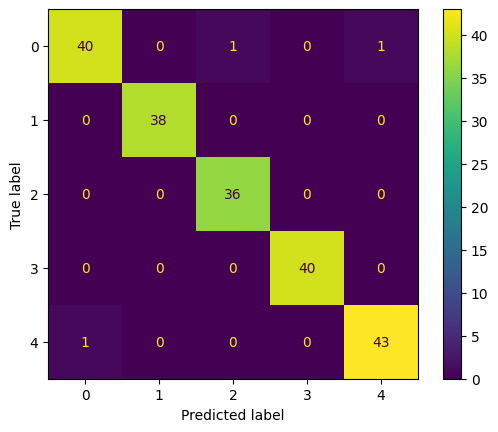

In [15]:
optimize_model(model_own_dataset, X3, y3)